# 0. 설정

In [1]:
# 공통 모듈 임포트
import sklearn
import numpy as np
import pandas as pd

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


import sys
#os: Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게하는 모듈
import os
#tarfile: 여러 개의 파일을 tar 형식으로 합치거나 이를 해제할 때 사용하는 모듈
import tarfile
#urllib: URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import urllib.request

#1. 문제 정의 및 데이터 수집

- https://www.kaggle.com/datasets/camnugent/california-housing-prices
- https://becomeanexpert.tistory.com/3

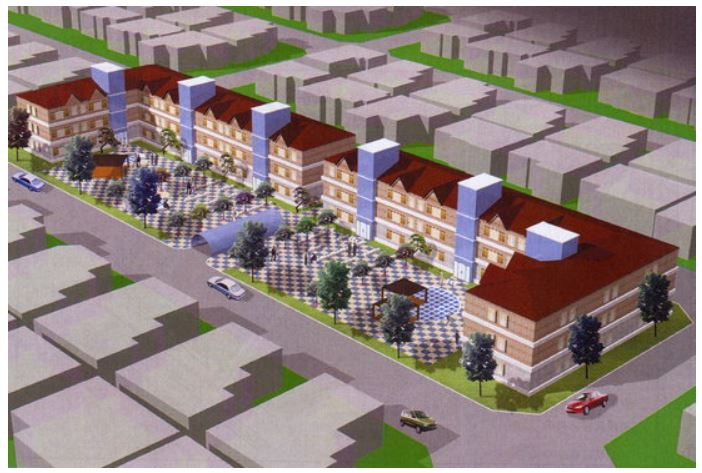

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
# 파일은 코랩 환경에서 다운받아서 압축 해제
fetch_housing_data()

In [59]:
# 압축 해제된 csv 파일을 판다스 데이터프레임 객체에 담기.
housing = load_housing_data()

#2. 점검 및 탐색

## 데이터 탐색

In [6]:
# 데이터 확인하기, 셀의 마지막줄에 객체 입력 시 확인 가능,
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- longitude: 경도 
- latitude: 위도
- housing_median_age: 주택이 지어진 기간(중앙값)
- total_bedrooms: 전체 방의 개수
- total_bedrooms: 전체 침실 개수
- population: 인구 수
- households: 세대 수
- median_income: 중간 소득
- median_house_value: 중간 주택 가격
- ocean_proximity: 바다 접근도

In [8]:
# 데이터탐색 방법: head(), tail()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [9]:
housing.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [10]:
# 데이터 행, 열 개수 확인: shape
housing.shape

(20640, 10)

In [11]:
# 데이터 칼럼 이름 추출: columns
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
# 특정 칼럼의 데이터 확인: dtypes
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
#결측치 개수 확인: isnull(),sum()
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
# 결측치 시각화 모듈: missingno - missingno.matrix()
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


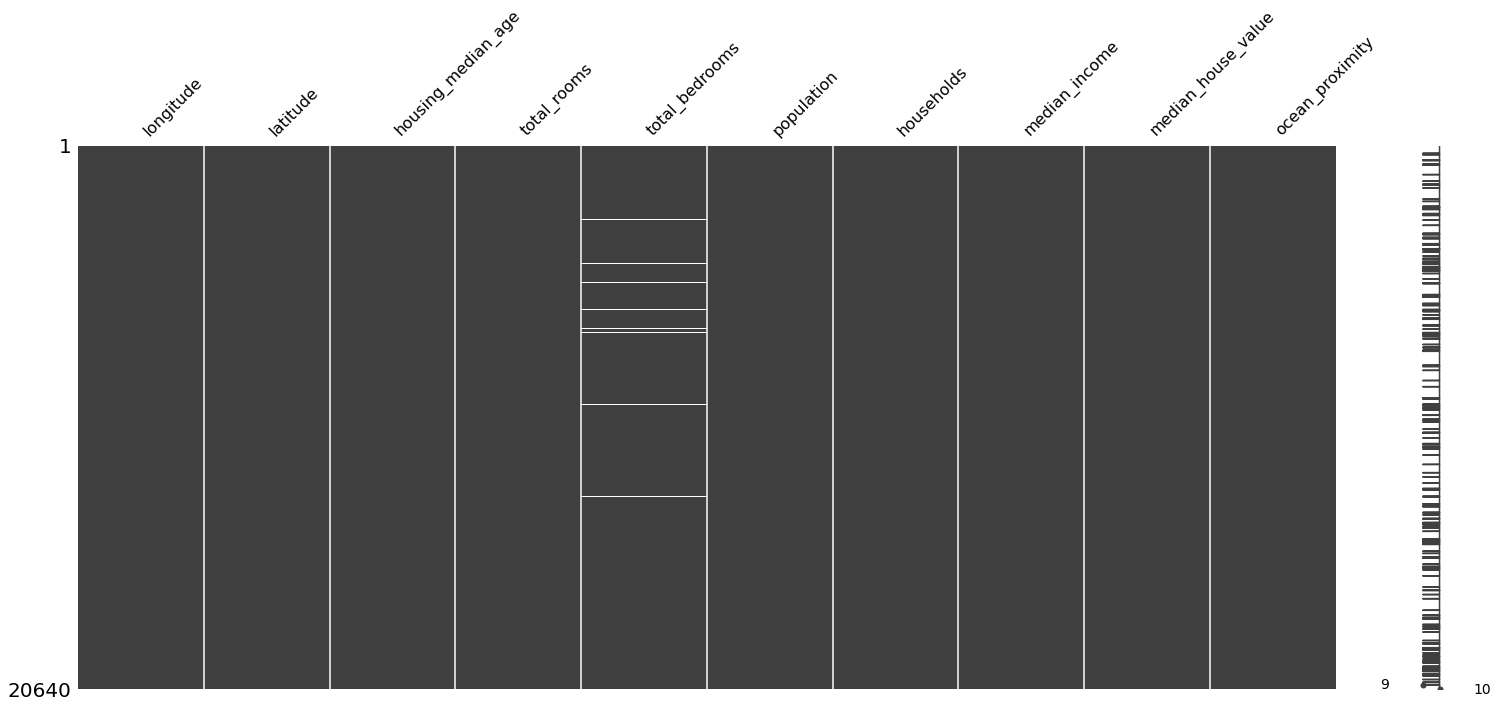

In [17]:
import missingno as mn
mn.matrix(housing)

In [ ]:
# 데이터 요약 자료를 전체 한눈에 확인하기: info()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
# 데이터의 통계 자료 확인하기: describe()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [19]:
# 특정 칼럼의 데이터 카테고리별 값 세기: value_counts(), 범주형 데이터에 주로 사용
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [22]:
housing[['population', 'total_rooms']]

,population,total_rooms
0,322.0,880.0
1,2401.0,7099.0
2,496.0,1467.0
3,558.0,1274.0
4,565.0,1627.0
...,...,...
20635,845.0,1665.0
20636,356.0,697.0
20637,1007.0,2254.0
20638,741.0,1860.0


In [20]:
# 어려운 버전: groupby + 다른 집계 함수 설명.
housing.groupby('ocean_proximity')[['population', 'total_rooms']].sum()

,population,total_rooms
ocean_proximity,,
<1H OCEAN,13889374.0,24012547.0
INLAND,9112744.0,17803933.0
ISLAND,3340.0,7873.0
NEAR BAY,2817427.0,5710320.0
NEAR OCEAN,3598955.0,6867477.0


In [23]:
housing.groupby('ocean_proximity')[['population', 'total_rooms']].mean()

,population,total_rooms
ocean_proximity,,
<1H OCEAN,1520.290499,2628.343586
INLAND,1391.046252,2717.742787
ISLAND,668.000000,1574.600000
NEAR BAY,1230.317467,2493.589520
NEAR OCEAN,1354.008653,2583.700903


In [24]:
housing.groupby('ocean_proximity')[['population', 'total_rooms']].agg(['sum', 'size', 'mean', 'std', 'min', 'max']) 

population                                                  \
                        sum  size         mean          std    min      max   
ocean_proximity                                                               
<1H OCEAN        13889374.0  9136  1520.290499  1185.848357    3.0  35682.0   
INLAND            9112744.0  6551  1391.046252  1168.670126    5.0  16305.0   
ISLAND               3340.0     5   668.000000   301.691067  341.0   1100.0   
NEAR BAY          2817427.0  2290  1230.317467   885.899035    8.0   8276.0   
NEAR OCEAN        3598955.0  2658  1354.008653  1005.563166    8.0  12873.0   

                total_rooms                                                  
                        sum  size         mean          std    min      max  
ocean_proximity                                                              
<1H OCEAN        24012547.0  9136  2628.343586  2160.463696   11.0  37937.0  
INLAND           17803933.0  6551  2717.742787  2385.831111    2.0  39320.0  
ISLAND               7873.0     5  1574.600000   707.545264  716.0   2359.0  
NEAR BAY          5710320.0  2290  2493.589520  1830.817022    8.0  18634.0  
NEAR OCEAN        6867477.0  2658  2583.700903  1990.724760   15.0  30405.0

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## 시각화

- seaborn 시각화 자료: https://seaborn.pydata.org/examples/index.html
- 예제 블로그: https://coding-kindergarten.tistory.com/133?category=1003348

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78130737d0>,
      dtype=object)

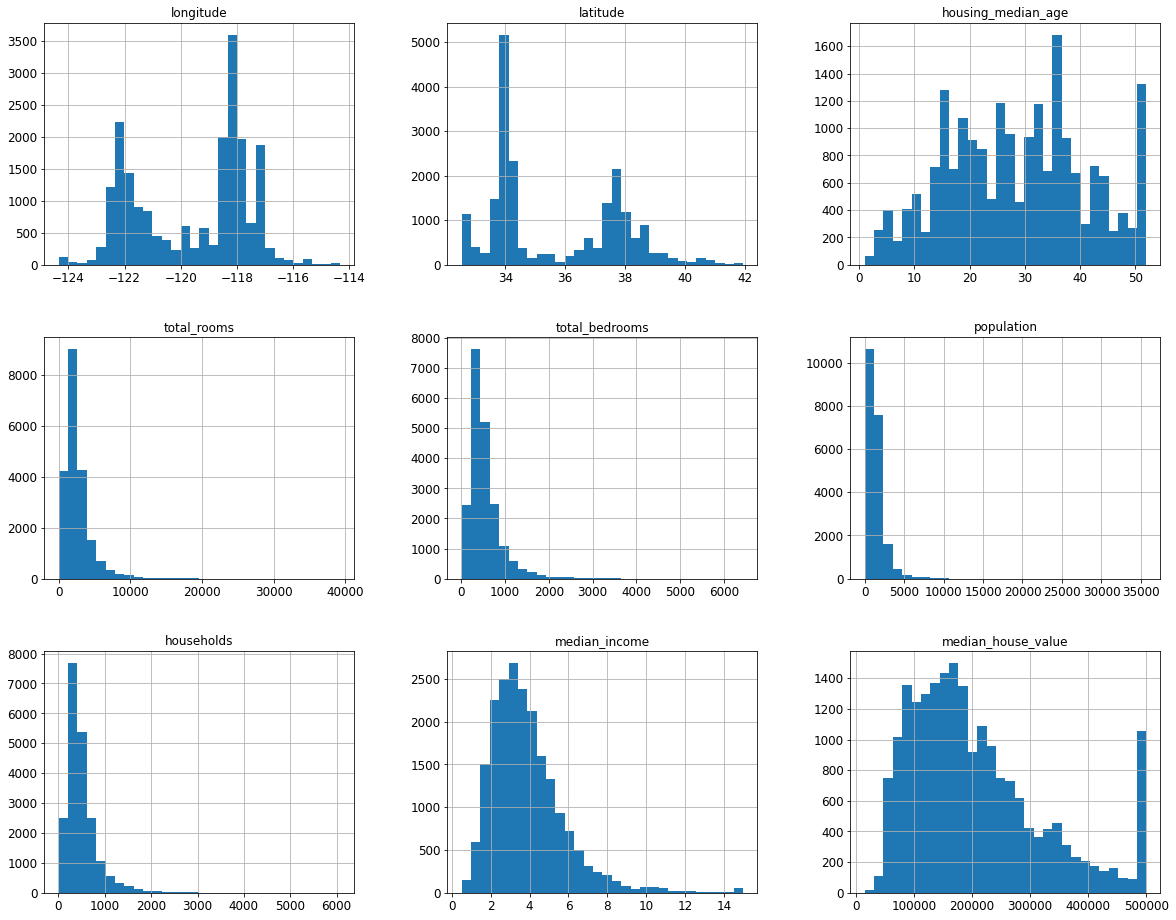

In [25]:
#히스토그램: data.hist(bins=분할 갯수, figsize=(가로,세로))
housing.hist(bins=30, figsize=(20,16))

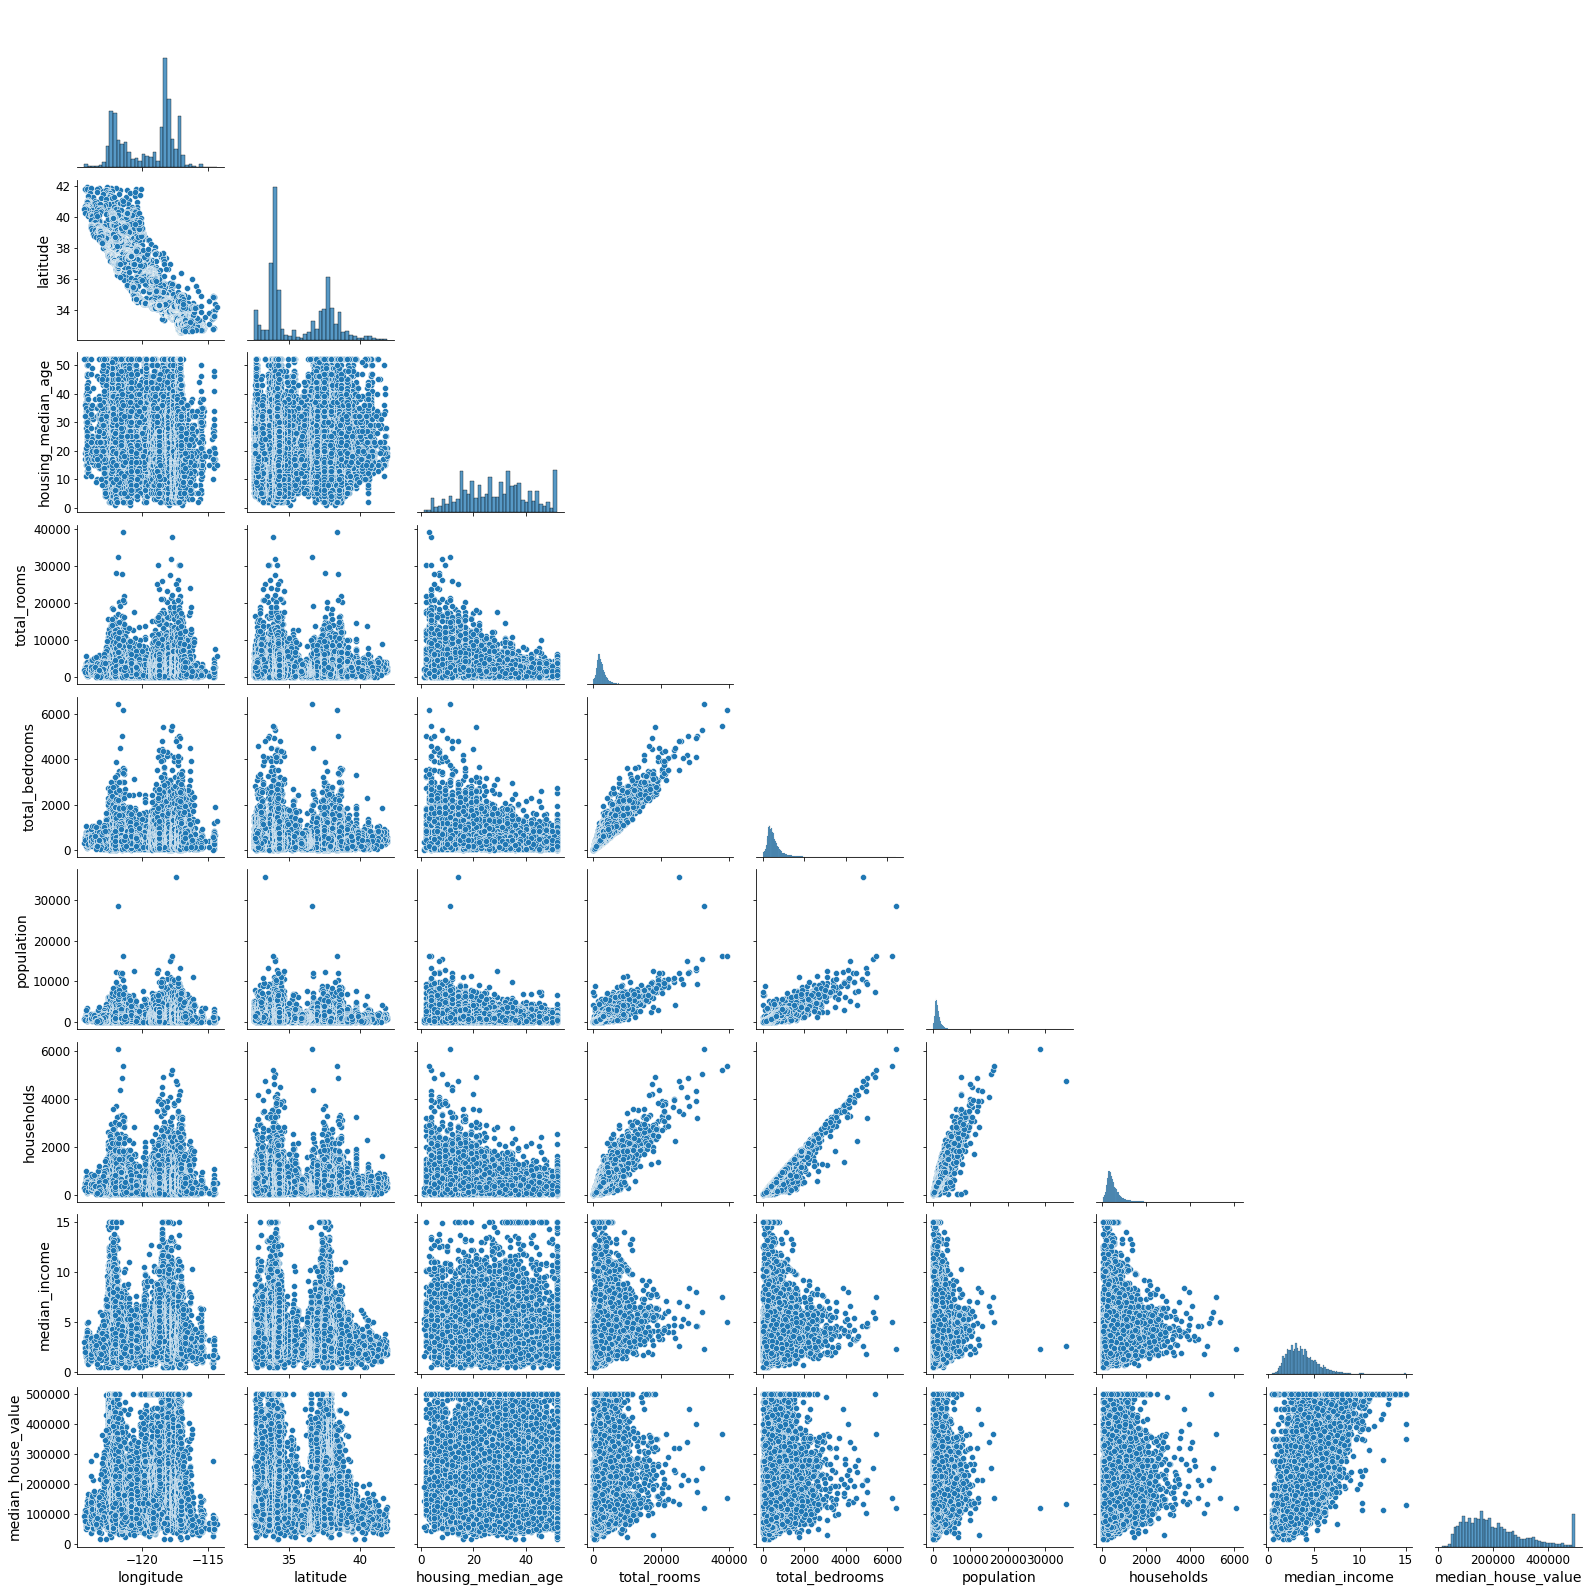

In [26]:
# 산점도와 히스토그램을 같이 확인하고 싶을 때: pairplot(data, corner = True)
sns.pairplot(housing, corner = True)

피어슨의 상관 계수(위키백과):
![Pearson correlation coefficient](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [27]:
# 상관분석: 
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [29]:
#종속변수와 독립변수간의 상관관계
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**cmap 관련 예제**
- 참고 자료: https://wikidocs.net/141538

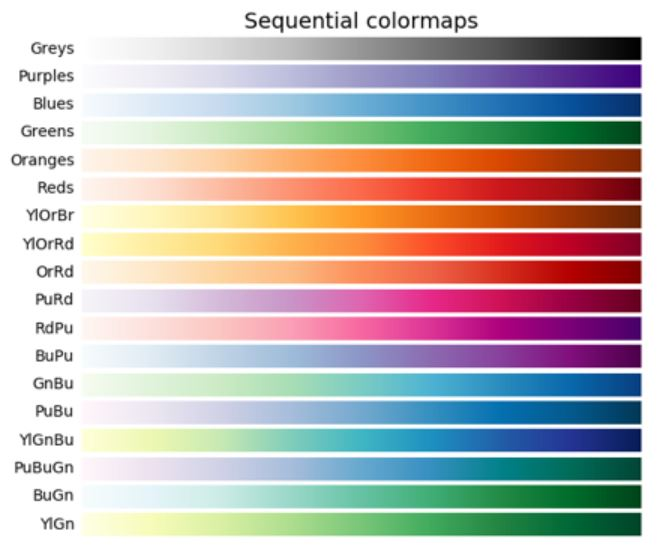

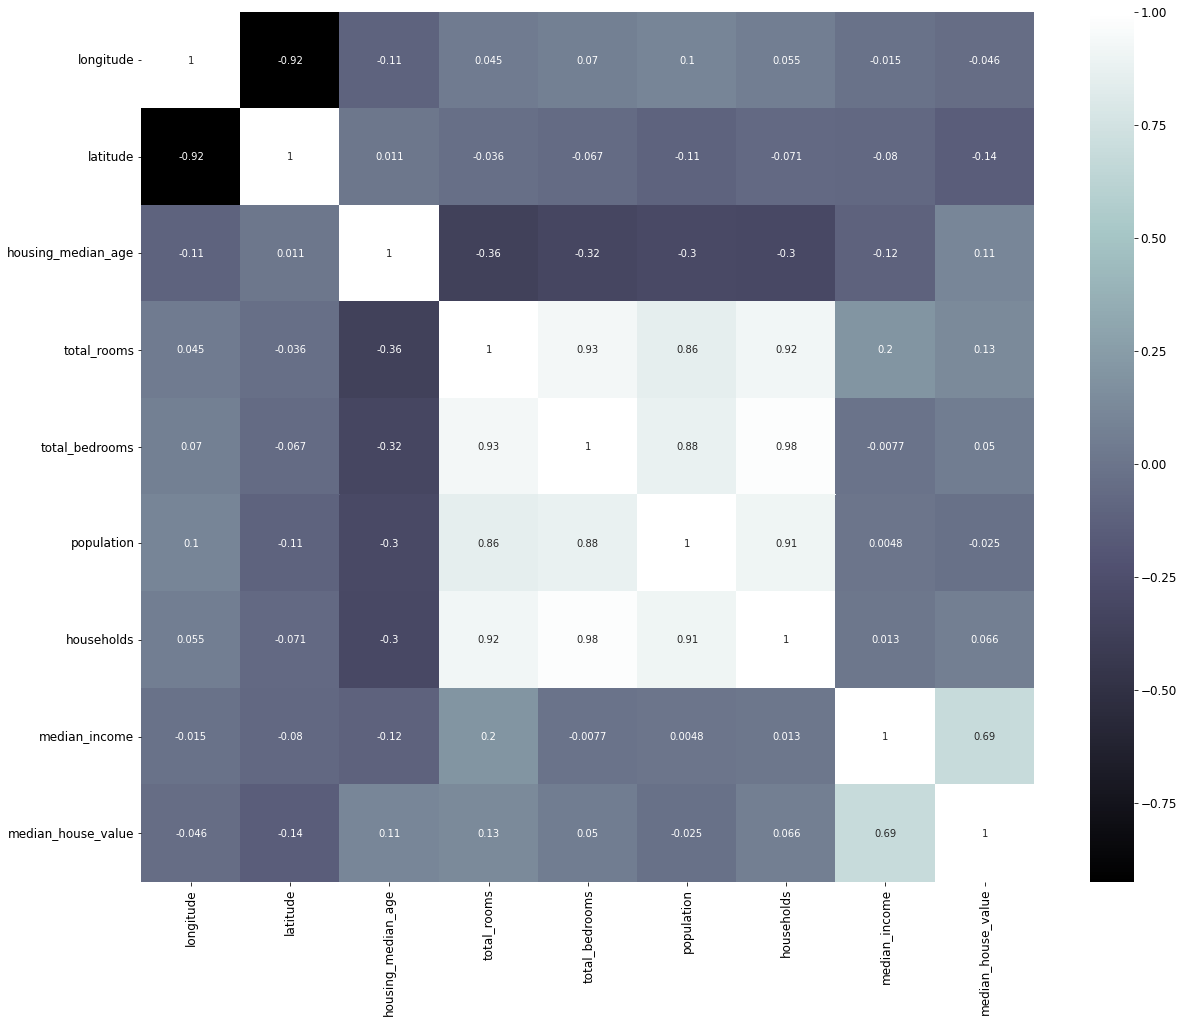

In [32]:
# 상관분석의 시각화: 
plt.figure(figsize = (20,16))
sns.heatmap(corr_matrix, annot = True, cmap='bone',)

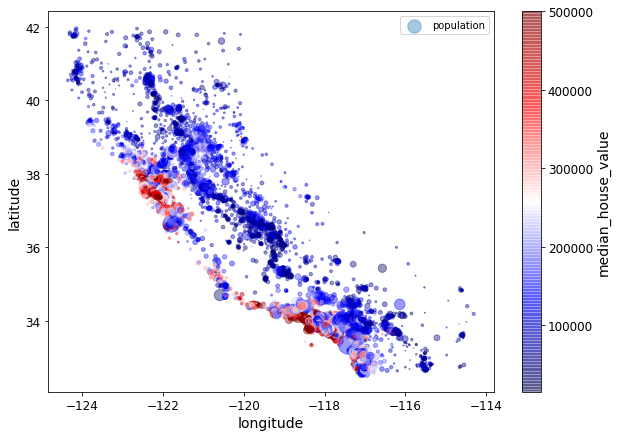

In [37]:
# 위도 경도를 통한 지도 위치 확인과 인구 밀집도 확인, 산점도 사용
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap='seismic', colorbar=True,
            sharex=False)
plt.legend()

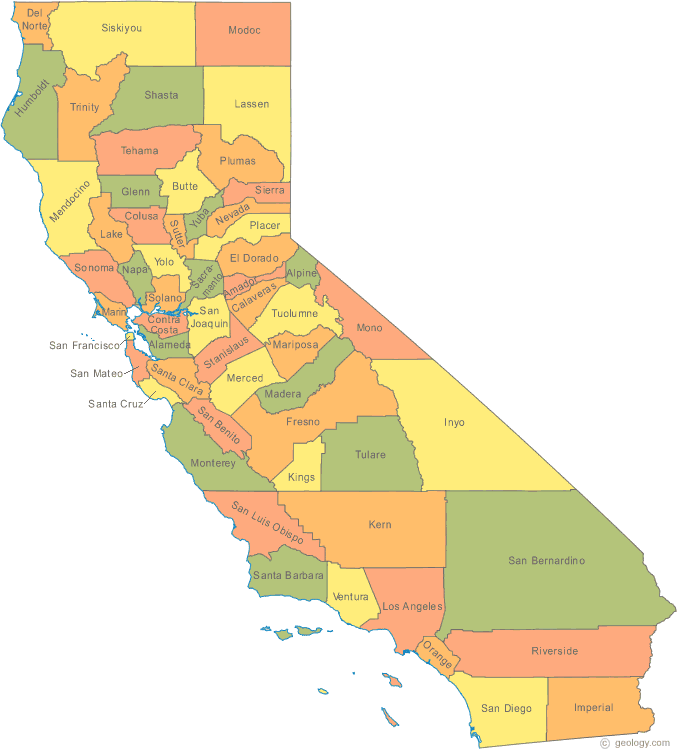

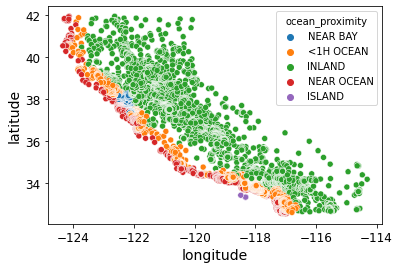

In [36]:
sns.scatterplot(data = housing, x='longitude', y='latitude', hue='ocean_proximity')

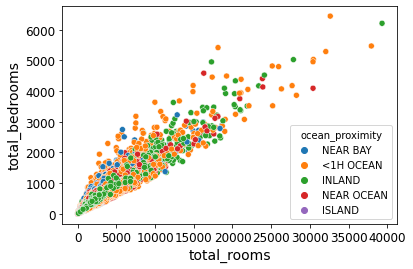

In [ ]:
sns.scatterplot(data = housing, x='total_rooms', y='total_bedrooms', hue='ocean_proximity')

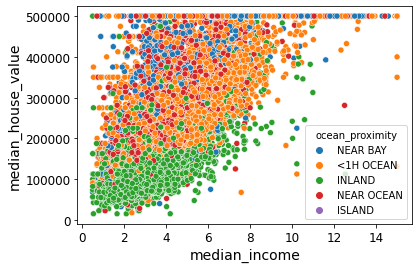

In [ ]:
sns.scatterplot(data = housing, x='median_income', y='median_house_value', hue='ocean_proximity')

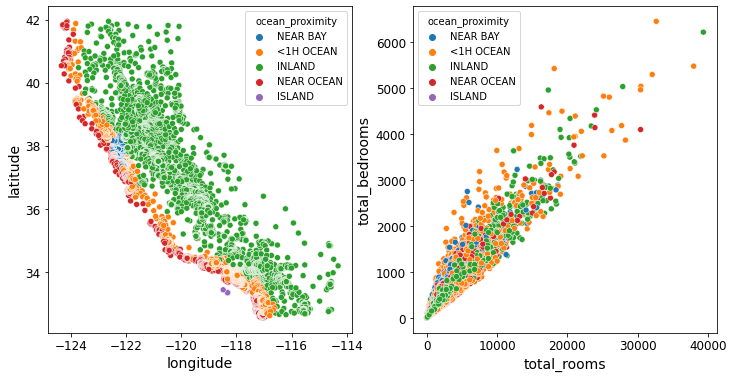

In [39]:
# 차트 여려개 한번에 출력하기 subplots(nrows = 행의 개수,ncolumns = 열의 개수)
# 여러개 출력할 때의 사이즈 조정 방법:subplots에서 반환된 fig에서 .set_size_inches(가로, 세로) 사용

fig, ((ax1,ax2)) = plt.subplots(ncols = 2)
fig.set_size_inches(12,6)
sns.scatterplot(data = housing, x='longitude', y='latitude', hue='ocean_proximity', ax = ax1)
sns.scatterplot(data = housing, x='total_rooms', y='total_bedrooms', hue='ocean_proximity', ax = ax2)
#sns.scatterplot(data = housing, x='median_income', y='median_house_value', hue='ocean_proximity', ax = ax3)
plt.show()

#3. 전처리 및 정제

(array([  50.,  163.,  347.,  675., 1012., 1341., 1363., 1592., 1524.,
        1616., 1513., 1259., 1401.,  990.,  935.,  812.,  715.,  582.,
         398.,  483.,  310.,  280.,  168.,  147.,  155.,  137.,  109.,
          86.,   60.,   36.,   28.,   23.,   33.,   58.,   36.,   35.,
          27.,   10.,   14.,    7.,   12.,   10.,    7.,    8.,   10.,
           4.,    2.,    3.,    2.,   52.]),
 array([ 0.4999  ,  0.789904,  1.079908,  1.369912,  1.659916,  1.94992 ,
         2.239924,  2.529928,  2.819932,  3.109936,  3.39994 ,  3.689944,
         3.979948,  4.269952,  4.559956,  4.84996 ,  5.139964,  5.429968,
         5.719972,  6.009976,  6.29998 ,  6.589984,  6.879988,  7.169992,
         7.459996,  7.75    ,  8.040004,  8.330008,  8.620012,  8.910016,
         9.20002 ,  9.490024,  9.780028, 10.070032, 10.360036, 10.65004 ,
        10.940044, 11.230048, 11.520052, 11.810056, 12.10006 , 12.390064,
        12.680068, 12.970072, 13.260076, 13.55008 , 13.840084, 14.130088,
        

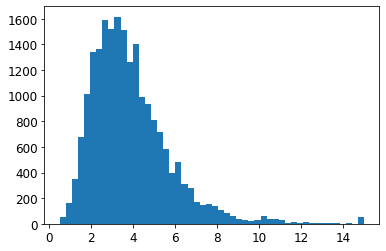

In [60]:
# 결과변수도 ocean_proximity와 같이 범주형 데이터로 표현이 되면 좋겠다.

plt.hist(housing["median_income"], bins=50)

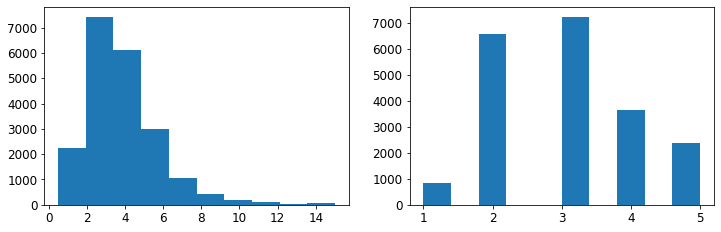

In [61]:
# 연속형 데이터를 범주형 데이터로 변경

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.hist(housing["median_income"])

plt.subplot(222)
plt.hist(housing["income_cat"])
plt.show()

In [62]:
# 연속형 데이터 비교: 
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64

In [63]:
# 범주형 데이터 비교: income_cat .value_counts()
housing['income_cat'].value_counts().sort_values(ascending=False)

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [64]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [65]:
housing.groupby('median_income')[['total_rooms','median_house_value']].mean()

,total_rooms,median_house_value
median_income,,
0.4999,248.416667,163608.500000
0.5360,51.100000,166999.900000
0.5495,1126.000000,91700.000000
0.6433,421.000000,111300.000000
0.6775,2806.000000,350000.000000
...,...,...
14.4219,1659.000000,500001.000000
14.5833,421.000000,500001.000000
14.9009,2327.000000,500001.000000


In [66]:
# 범주형 데이터를 활용한 집계함수
housing.groupby('income_cat')[['total_rooms','median_house_value']].mean()

,total_rooms,median_house_value
income_cat,,
1,1440.203163,112125.190998
2,2167.006686,136544.115940
3,2697.768104,199613.285240
4,3134.912339,258289.952459
5,3398.914479,378671.235394


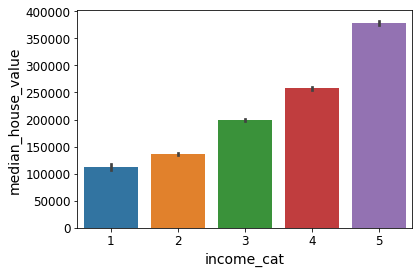

In [67]:
# 데이터 생성 후 시각화1: sns.barplot(data=housing, x = 'income_cat', y = '')
sns.barplot(data=housing, x = 'income_cat', y='median_house_value')

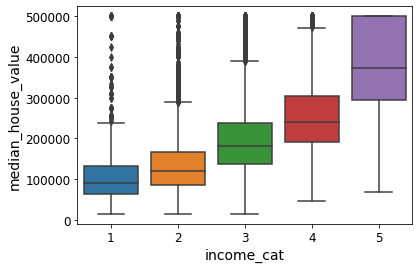

In [68]:
# 데이터 생성 후 시각화2: sns.boxplot(data=housing, x="income_cat", y="")
sns.boxplot(data=housing, x = 'income_cat', y='median_house_value')

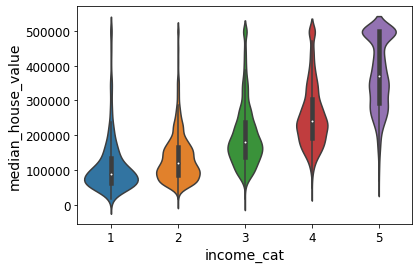

In [69]:
# 데이터 생성 후 시각화3: sns.violinplot(data=housing, x="income_cat", y="")
sns.violinplot(data=housing, x = 'income_cat', y='median_house_value')

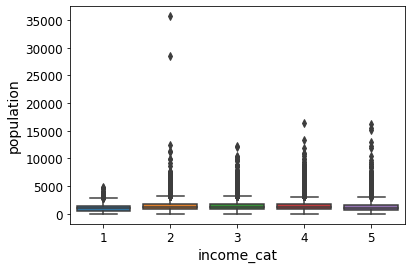

In [70]:

sns.boxplot(data=housing, x = 'income_cat', y='population')

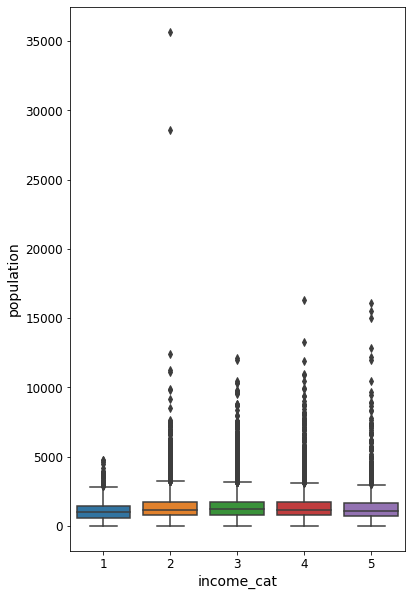

In [71]:
# 데이터 생성 후 시각화2: sns.boxplot(data=housing, x="income_cat", y="")

plt.figure(figsize=(6,10))
sns.boxplot(data=housing, x = 'income_cat', y='population')

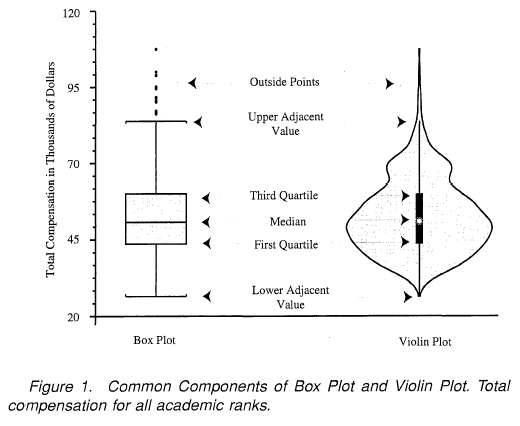



In [72]:
housing.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [73]:
# 결측치 처리: housing[housing.isnull().any(axis=1)].head()
housing[housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,3
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,2
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,4
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,5


In [75]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [76]:
# 결측치 처리 옵션1: EDA 결과 해당 칼럼은 필요 없을 것 같다.
housing.dropna( axis = 0, inplace = False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [77]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace = True)

In [78]:
housing[housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat


In [ ]:
# 이상값
# 상위 1%의 급여를 이상치로 처리해야할까? 
# 다른 예: 회사 급여 관련 데이터를 다룰때 CEO의 급여는 포함되어야하는가?

In [ ]:
# 노이즈 데이터
# X

# 데이터 통합
# X

In [79]:
# 범주형 데이터 - 문자열 처리 OrdinalEncoder vs OnehotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [85]:
# OnehotEncoder, 결과값이 희소행렬로 반환되기에 데이터를 확인하고 싶다면 .toarray()를 사용하여 배열로 변환해야함.처음부터 배열로 반환하려면 sparse = False 부여
#housing_cat_1hot.toarray()
cat_encoder = OneHotEncoder(sparse = False, dtype = np.int16)
housing_1hot = cat_encoder.fit_transform(housing_cat)
housing_1hot 

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=int16)

In [86]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# 기존 데이터 칼럼 삭제 및 인코딩된 데이터 추가
#housing.drop("ocean_proximity", axis=1, inplace = True)

In [89]:
housing[['ocean_proximity1', 'ocean_proximity2','ocean_proximity3','ocean_proximity4','ocean_proximity5']] = housing_1hot

In [90]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,ocean_proximity1,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,0,1,0,0,0


In [ ]:
# 특징 공학
# 주민번호, ID와 같이 필요 없는 데이터는 삭제

In [91]:
# 특징 공학 
# 칼럼 추가

# 가구 수 대비 방의 개수
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

# 방 대비 침실 개수
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

# 가구 수 대비 인구 수
housing["population_per_household"]=housing["population"]/housing["households"]

In [92]:
# 데이터 추가 후 종속변수와 독립변수 간의 상관분석

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
ocean_proximity1            0.256617
ocean_proximity4            0.160284
rooms_per_household         0.151948
ocean_proximity5            0.141862
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049454
ocean_proximity3            0.023416
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.220049
ocean_proximity2           -0.484859
Name: median_house_value, dtype: float64

In [ ]:
plt.figure(figsize = (20,16))
sns.heatmap(corr_matrix, annot = True, cmap='RdBu',)

In [93]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'income_cat', 'ocean_proximity1',
       'ocean_proximity2', 'ocean_proximity3', 'ocean_proximity4',
       'ocean_proximity5', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [94]:
#데이터 변환을 위한 열 분리

housingData = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'income_cat', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']]
housingOnehot = housing[['ocean_proximity1', 'ocean_proximity2','ocean_proximity3','ocean_proximity4','ocean_proximity5']]
housingResult = housing['median_house_value']

In [97]:
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,2,5.329513,0.219892,2.123209


In [95]:
# 데이터 변환 => 정규화, 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
housingData2 = MMS.fit_transform(housingData)

In [96]:
housingData2

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.0435123 , 0.02920287,
        0.00149943],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.03822395, 0.03187372,
        0.00114074],
       [0.21015936, 0.5642933 , 1.        , ..., 0.05275646, 0.02424893,
        0.00169796],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.03090386, 0.04910061,
        0.0013144 ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.03178269, 0.05046986,
        0.0011515 ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.03125246, 0.05084484,
        0.00154886]])

In [ ]:
housingData[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'income_cat', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']] = housingData2
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,1.00,0.043512,0.029203,0.001499
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,1.00,0.038224,0.031874,0.001141
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,1.00,0.052756,0.024249,0.001698
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75,0.035241,0.040189,0.001493
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.50,0.038534,0.036603,0.001198
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.25,0.029769,0.051843,0.001503
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.25,0.037344,0.049111,0.001956
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.25,0.030904,0.049101,0.001314
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.25,0.031783,0.050470,0.001152


In [102]:
# 분리됐던 데이터 재결합

housingFinal = pd.concat([housingData, housingOnehot], axis = 1)
housingFinal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity1,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,5,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,5,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,5,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,2,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,2,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,2,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,2,5.329513,0.219892,2.123209,0,1,0,0,0


###StratifiedShuffleSplit vs train_test_split

데이터 분리
- StratifiedShuffleSplit: 기준으로 삼은 데이터의 카테고리 비율과 같도록 훈련셋, 검증셋 분리
- train_test_split: 무작위 추출

In [99]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,ocean_proximity1,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,2,0.0,1.0,0.0,0.0,0.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,5,0.0,0.0,0.0,0.0,1.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,2,0.0,1.0,0.0,0.0,0.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,2,0.0,0.0,0.0,0.0,1.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,3,1.0,0.0,0.0,0.0,0.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,4,1.0,0.0,0.0,0.0,0.0,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,2,0.0,1.0,0.0,0.0,0.0,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,3,1.0,0.0,0.0,0.0,0.0,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,3,1.0,0.0,0.0,0.0,0.0,6.297405,0.183835,2.411178


In [100]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,ocean_proximity1,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,3,0,0,0,0,1,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,3,0,0,0,0,1,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,3,0,0,0,0,1,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,2,0,0,0,0,1,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,3,0,1,0,0,0,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,5,1,0,0,0,0,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,3,0,1,0,0,0,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,2,1,0,0,0,0,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,4,1,0,0,0,0,6.395349,0.166993,3.178891


In [ ]:
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [ ]:
# 훈련, 테스트 데이터셋를 분리한 후 X,Y 분리.
# housing = housing.drop("median_house_value", axis=1) 
# housing_labels = housing["median_house_value"].copy()

In [103]:
#훈련 X,y, 테스트 X,y 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(housingFinal, housingResult, test_size=0.2, random_state=42)


In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity1,ocean_proximity2,ocean_proximity3,ocean_proximity4,ocean_proximity5
14196,0.729084,0.018066,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322,0.50,0.029572,0.044866,0.002414,0.0,0.0,0.0,0.0,1.0
8267,0.616534,0.130712,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452,0.50,0.025715,0.054186,0.000842,0.0,0.0,0.0,0.0,1.0
17445,0.385458,0.225292,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162,0.50,0.034025,0.037296,0.001634,0.0,0.0,0.0,0.0,1.0
14265,0.721116,0.015940,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488,0.25,0.022378,0.061604,0.002657,0.0,0.0,0.0,0.0,1.0
2271,0.453187,0.450584,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638,0.50,0.038439,0.039169,0.001294,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.636454,0.131775,0.666667,0.033776,0.031037,0.018358,0.035520,0.404829,1.00,0.037451,0.030519,0.001883,1.0,0.0,0.0,0.0,0.0
11964,0.689243,0.157279,0.627451,0.078386,0.088299,0.049048,0.073672,0.175867,0.50,0.042693,0.040296,0.002585,0.0,1.0,0.0,0.0,0.0
5390,0.594622,0.158342,0.686275,0.053385,0.088144,0.049133,0.086499,0.167894,0.25,0.022264,0.065246,0.002124,1.0,0.0,0.0,0.0,0.0
860,0.238048,0.535600,0.274510,0.090874,0.092489,0.049721,0.091761,0.359947,0.75,0.039338,0.035122,0.002001,1.0,0.0,0.0,0.0,0.0


#4. 모델링 및 훈련
#5. 검증 및 평가

In [104]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [106]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [107]:
# MSE, RMSE를 사용한 결과 비교
from sklearn.metrics import mean_squared_error

data_predictions = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, data_predictions)
tree_reg_rmse = np.sqrt(mse)
print(f"DecisionTreeRegressor 결과: {tree_reg_rmse}")

data_predictions = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, data_predictions)
lin_reg_rmse = np.sqrt(mse)
print(f"LinearRegression 결과: {lin_reg_rmse}")

data_predictions = forest_reg.predict(X_test)
mse = mean_squared_error(y_test, data_predictions)
forest_reg_rmse = np.sqrt(mse)
print(f"RandomForestRegressor 결과: {forest_reg_rmse}")

DecisionTreeRegressor 결과: 72378.40396758459
LinearRegression 결과: 75779.43018776513
RandomForestRegressor 결과: 50107.21751396394


In [ ]:
# MAE, RMAE 오차함수
from sklearn.metrics import mean_absolute_error

data_predictions = MLmodel.predict(X_test)
mae = mean_absolute_error(y_test, data_predictions)
rmae = np.sqrt(mae)
rmae

### K-fold Cross Validation

In [108]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [49788.66064174 51485.89743748 50515.32463073 49456.58112836
 50039.65971658]
평균: 50257.22471097624
표준 편차: 704.864412151116


### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 개의 폴드로 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# 가장 성능이 좋은 모델의 파라미터
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
#가장 성능이 좋은 모델
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [ ]:
# 테스트를 거친 모델의 성능과 하이퍼 파라미터 값
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64001.11783560465 {'max_features': 2, 'n_estimators': 3}
55162.1010926725 {'max_features': 2, 'n_estimators': 10}
52731.72856768272 {'max_features': 2, 'n_estimators': 30}
60698.29639852072 {'max_features': 4, 'n_estimators': 3}
53576.75170966425 {'max_features': 4, 'n_estimators': 10}
51359.404522420664 {'max_features': 4, 'n_estimators': 30}
60555.54663730382 {'max_features': 6, 'n_estimators': 3}
53156.57535136891 {'max_features': 6, 'n_estimators': 10}
50696.313762994 {'max_features': 6, 'n_estimators': 30}
58855.926556363665 {'max_features': 8, 'n_estimators': 3}
52712.49609008448 {'max_features': 8, 'n_estimators': 10}
50952.81186075504 {'max_features': 8, 'n_estimators': 30}
62381.9526068444 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54678.321164539 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61101.71479111239 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53354.10799322392 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59

In [ ]:
# 전체 결과 데이터를 데이터프레임을 사용하여 확인, cv_results_
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056924,0.002262,0.004910,0.000308,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.178686e+09,-3.965267e+09,...,-4.096143e+09,1.218160e+08,18,-1.040526e+09,-1.068546e+09,-1.081130e+09,-1.090340e+09,-1.100795e+09,-1.076267e+09,2.078637e+07
1,0.179777,0.003249,0.012093,0.000736,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.114936e+09,-2.997901e+09,...,-3.042857e+09,1.072962e+08,11,-5.673551e+08,-5.780981e+08,-5.756488e+08,-5.989910e+08,-5.822443e+08,-5.804675e+08,1.045990e+07
2,0.525990,0.004368,0.030565,0.000947,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.842145e+09,-2.753981e+09,...,-2.780635e+09,6.977374e+07,6,-4.352453e+08,-4.363696e+08,-4.368313e+08,-4.381430e+08,-4.282690e+08,-4.349716e+08,3.477657e+06
3,0.092921,0.001305,0.005031,0.000205,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.582818e+09,-3.602642e+09,...,-3.684283e+09,1.182060e+08,15,-9.639070e+08,-1.012910e+09,-9.569372e+08,-9.698302e+08,-9.712268e+08,-9.749622e+08,1.963384e+07
4,0.294111,0.002545,0.011886,0.000551,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.798475e+09,-2.911999e+09,...,-2.870468e+09,9.742404e+07,9,-5.293965e+08,-5.314144e+08,-5.129088e+08,-5.413270e+08,-5.252930e+08,-5.280679e+08,9.233238e+06
5,0.965176,0.078995,0.033914,0.004469,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.594712e+09,-2.696749e+09,...,-2.637788e+09,7.525865e+07,3,-4.047142e+08,-4.039783e+08,-4.064363e+08,-4.059343e+08,-4.038554e+08,-4.049837e+08,1.036383e+06
6,0.127700,0.002315,0.005070,0.000391,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.641000e+09,-3.746177e+09,...,-3.666974e+09,6.533602e+07,14,-9.349145e+08,-9.159362e+08,-9.333114e+08,-9.837594e+08,-9.662970e+08,-9.468437e+08,2.458413e+07
7,0.597793,0.207539,0.015503,0.001082,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.815102e+09,-2.848422e+09,...,-2.825622e+09,5.958996e+07,7,-5.333859e+08,-5.088530e+08,-5.235138e+08,-5.200554e+08,-5.165474e+08,-5.204711e+08,8.082056e+06
8,1.380238,0.120338,0.033879,0.003825,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.551296e+09,-2.602271e+09,...,-2.570116e+09,5.996856e+07,1,-4.017056e+08,-3.916145e+08,-3.975904e+08,-3.943869e+08,-3.992540e+08,-3.969103e+08,3.559868e+06
9,0.211988,0.025004,0.006950,0.001570,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.465460e+09,-3.498453e+09,...,-3.464020e+09,4.632337e+07,12,-9.024985e+08,-9.416874e+08,-9.114104e+08,-9.131598e+08,-9.436290e+08,-9.224770e+08,1.688114e+07


In [ ]:
# 데이터 표현 형태 변경
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.1,0.0,0.0,0.0,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4178685938.3,-3965266848.8,...,-4096143084.2,121816000.1,18,-1040525688.0,-1068545523.8,-1081130438.2,-1090340062.8,-1100794527.9,-1076267248.1,20786372.1
1,0.2,0.0,0.0,0.0,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3114936253.4,-2997901002.8,...,-3042857397.0,107296196.4,11,-567355109.9,-578098144.5,-575648778.0,-598991045.3,-582244349.7,-580467485.5,10459900.8
2,0.5,0.0,0.0,0.0,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2842145249.2,-2753981203.0,...,-2780635197.7,69773744.2,6,-435245324.5,-436369564.5,-436831314.8,-438142978.2,-428268983.3,-434971633.0,3477656.7
3,0.1,0.0,0.0,0.0,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3582818486.8,-3602641706.4,...,-3684283185.7,118205973.5,15,-963906962.0,-1012909926.8,-956937241.7,-969830225.1,-971226840.2,-974962239.2,19633835.4
4,0.3,0.0,0.0,0.0,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2798475035.1,-2911999471.3,...,-2870468323.8,97424040.7,9,-529396464.5,-531414376.7,-512908848.5,-541326955.5,-525293014.6,-528067932.0,9233237.5
5,1.0,0.1,0.0,0.0,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2594711925.8,-2696748958.8,...,-2637788432.9,75258647.5,3,-404714243.7,-403978278.4,-406436339.0,-405934325.5,-403855371.4,-404983711.6,1036383.5
6,0.1,0.0,0.0,0.0,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3641000329.8,-3746176551.1,...,-3666974228.5,65336015.5,14,-934914545.3,-915936238.4,-933311359.0,-983759364.8,-966296973.1,-946843696.1,24584126.2
7,0.6,0.2,0.0,0.0,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2815101633.0,-2848421571.4,...,-2825621503.1,59589958.3,7,-533385897.4,-508853005.2,-523513803.4,-520055353.3,-516547432.6,-520471098.4,8082056.4
8,1.4,0.1,0.0,0.0,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2551296007.2,-2602271118.0,...,-2570116229.2,59968561.5,1,-401705607.4,-391614523.5,-397590440.1,-394386938.6,-399254041.2,-396910310.2,3559867.6
9,0.2,0.0,0.0,0.0,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3465460315.9,-3498453470.2,...,-3464020090.8,46323370.9,12,-902498532.3,-941687421.2,-911410443.7,-913159819.5,-943628972.5,-922477037.8,16881136.9


In [ ]:
# 데이터 형태 복구
pd.reset_option('display.float_format')

In [ ]:
estimator = grid_search.best_estimator_

In [ ]:
data_predictions = estimator.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, data_predictions)
print(f"결과: {np.sqrt(mse)}")

결과: 50463.56343593899


##결과 시각화

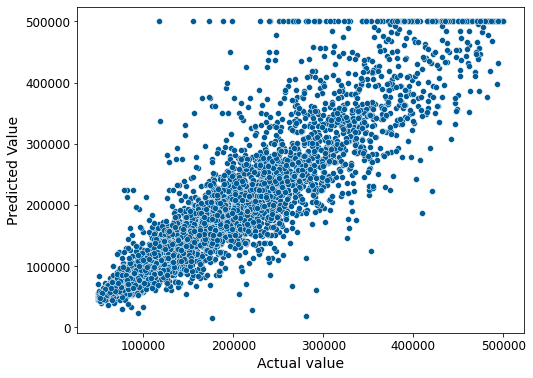

In [ ]:
plt.figure(figsize= (8, 6))
sns.scatterplot(x= data_predictions, y= y_test, color= '#005b96')
plt.xlabel('Actual value')
plt.ylabel('Predicted Value')
plt.show()

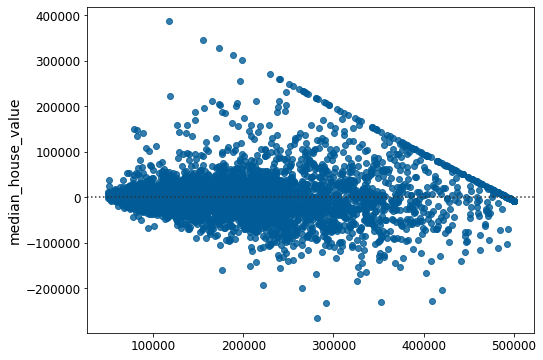

In [ ]:
# 회귀선을 기준으로 데이터들의 오차를 나타낸 그래프 sns.residplot()
plt.figure(figsize= (8, 6))
sns.residplot(x= data_predictions, y = y_test, color= '#005b96')
plt.show()

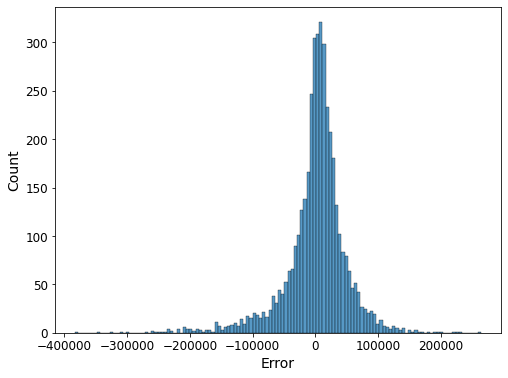

In [ ]:
resid = data_predictions - y_test
plt.figure(figsize= (8, 6))
sns.histplot(resid)
plt.xlabel('Error');

## Pipeline 구축

In [ ]:
housing = load_housing_data()

In [ ]:
#훈련 X,y, 테스트 X,y 데이터셋 분리
X_housing =housing.drop('median_house_value', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_housing, housing['median_house_value'].copy(), test_size=0.2, random_state=42)

In [ ]:
# 참고 블로그: https://databuzz-team.github.io/2018/11/11/make_pipeline/
# 칼럼별 전처리를 위한 데이터 칼럼 선택 클래스
from sklearn.base import BaseEstimator, TransformerMixin

# 수치형 열과 범주형 열을 선택하기 위한 클래스
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [ ]:
#결측치 처리 모듈: SimpleImputer
from sklearn.impute import SimpleImputer

# ocean_proximity로 인해 에러 발생 => housing_num = housing.drop("ocean_proximity", axis=1)
imputer = SimpleImputer(strategy="median")
#print(imputer.strategy)
#imputer.fit(housing_num)

#imputer.statistics_
#housing_num.median().values

#X = imputer.transform(housing_num)
#housing_tr = pd.DataFrame(X, columns=housing_num.columns,
#                          index=housing_num.index)

In [ ]:
# Pipe Line 
from sklearn.pipeline import Pipeline

num_attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
#num_attribs = list(housing)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', MinMaxScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [ ]:
# 데이터셋을 나누어 각각의 파이트라인을 거친 후 재결합하기 위한 모듈: FeatureUnion, ColumnTransformer
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

In [ ]:
from sklearn.compose import ColumnTransformer #셀렉터 필요 없음
num_attribs= ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
#num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler()),
    ])

cat_pipeline = Pipeline([
        ('cat_encoder', OneHotEncoder(handle_unknown="ignore")),
    ])


full_pipeline = ColumnTransformer(transformers = [
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(X_train)
housing_prepared

array([[0.72908367, 0.01702128, 0.62745098, ..., 0.        , 0.        ,
        1.        ],
       [0.61653386, 0.12978723, 0.94117647, ..., 0.        , 0.        ,
        1.        ],
       [0.38545817, 0.22446809, 0.05882353, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59462151, 0.15744681, 0.68627451, ..., 0.        , 0.        ,
        0.        ],
       [0.23804781, 0.53510638, 0.2745098 , ..., 0.        , 0.        ,
        0.        ],
       [0.19223108, 0.55531915, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
clf = Pipeline(
    steps=[("FullPipe", full_pipeline), 
           ("classifier", RandomForestRegressor())]
        )

y_pred = clf.fit(X_train, y_train)

#6. 배포

In [ ]:
#my_model = model or piplineModel

import joblib
joblib.dump(clf, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF